In [ ]:
!pip install sweetviz

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [110]:
dataset_address = 'drive/MyDrive/loan.csv'
df = pd.read_csv(dataset_address)
df

,id,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Revolving Utilities,Status,Total Collection Amount,Loan Title,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Batch Enrolled,Open Account,Loan Amount,Accounts Delinquent,Home Ownership,Payment Plan,Collection Recovery Fee,Total Accounts,Verification Status,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Sub Grade,Inquires - six months,Total Received Late Fee
0,15356036,RENT,f,8573.988032,C,29896,15.318878,162072,5.040081,89.268566,0,28,Credit card refinancing,43102,7532,1725.650601,18.653836,121,0,BAT3873588,9,21158,0,63384.64567,n,0.667117,8,Source Verified,INDIVIDUAL,0,0,59,B2,0,0.111414
1,8801422,MORTGAGE,f,16513.017240,B,8791,27.476106,236347,5.109262,80.967111,0,11,Debt consolidation,5920,23818,2017.203385,13.161459,88,0,BAT1780517,12,16940,0,63613.19475,n,1.104852,24,Not Verified,INDIVIDUAL,0,0,59,E2,0,15.504601
2,4613258,RENT,w,19406.659250,B,5437,14.123433,57992,0.704006,49.222410,0,26,Debt consolidation,14694,16308,318.120616,17.474027,133,0,BAT1930365,13,14717,0,46293.04970,n,0.975493,11,Source Verified,INDIVIDUAL,0,0,58,A5,0,0.089771
3,21211589,RENT,f,12530.414800,E,8962,16.955268,416602,2.991794,54.667623,0,22,Debt consolidation,207,9652,4717.800477,7.244524,49,0,BAT5629144,16,16492,0,140793.28580,n,1.125709,19,Not Verified,INDIVIDUAL,0,1,58,B4,0,0.054555
4,62754530,MORTGAGE,f,23840.996110,C,62114,8.502513,74796,2.316019,50.660102,0,5,Credit card refinancing,18210,10851,1251.816303,12.152981,12,0,BAT2252229,16,14530,0,90248.30126,n,1.010773,18,Source Verified,INDIVIDUAL,0,0,58,C3,0,0.003892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65362,12345190,RENT,w,21663.796770,C,11621,34.295417,725038,7.266338,56.192468,0,42,Debt consolidation,2374,17160,847.736617,14.912243,93,0,BAT5489674,6,6058,0,56455.81386,n,0.936128,21,Source Verified,INDIVIDUAL,2,0,59,F2,0,0.028980
65363,5512346,RENT,w,22372.597940,A,24547,20.652692,215415,2.056458,48.117358,0,58,Other,3818,24060,1557.138987,15.031181,113,0,BAT3461431,14,10033,0,76880.93246,n,0.578525,11,Source Verified,INDIVIDUAL,1,0,58,A5,0,0.111133
65364,25558542,MORTGAGE,f,16600.887980,C,5141,31.706142,69087,1.557060,25.822401,0,34,Debt Consolidation,1266,7678,2236.997007,11.386649,10,0,BAT2558388,7,6122,0,82146.64884,n,0.388201,10,Source Verified,INDIVIDUAL,0,0,59,F4,1,0.033125
65365,6690876,MORTGAGE,w,10634.866770,C,7727,19.289700,224716,5.717495,5.685792,0,41,Debt consolidation,4066,10847,2493.667700,10.095507,133,0,BAT1780517,8,14847,0,44232.83125,n,0.262648,24,Source Verified,INDIVIDUAL,0,0,58,A2,0,0.095813


check missing value 

In [111]:
df.isnull().sum()

id                              0
Employment Duration             0
Initial List Status             0
Funded Amount Investor          0
Grade                           0
Total Revolving Credit Limit    0
Debit to Income                 0
Total Current Balance           0
Recoveries                      0
Revolving Utilities             0
Status                          0
Total Collection Amount         0
Loan Title                      0
Revolving Balance               0
Funded Amount                   0
Total Received Interest         0
Interest Rate                   0
Last week Pay                   0
Public Record                   0
Batch Enrolled                  0
Open Account                    0
Loan Amount                     0
Accounts Delinquent             0
Home Ownership                  0
Payment Plan                    0
Collection Recovery Fee         0
Total Accounts                  0
Verification Status             0
Application Type                0
Delinquency - 

outlier

<Axes: >

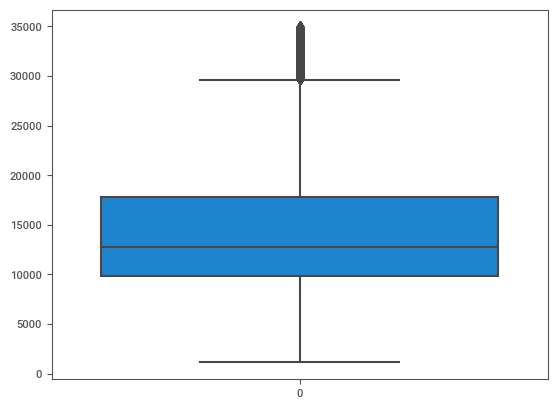

In [112]:
import seaborn as sns
sns.boxplot(df['Funded Amount Investor'])

outlire</br>I checked values by Excel but I dont have much information about these values so i think there were no unnormal value 

data encoding

In [113]:
df['Grade'] = df['Grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
df["Employment Duration"] = df["Employment Duration"].map({"MORTGAGE":3,"RENT":2,"OWN":1})

vs = pd.get_dummies(df['Verification Status'])
df = pd.concat([df,vs],axis=1)

#at = pd.get_dummies(df['Application Type'])
#df = pd.concat([df,at],axis=1)
df['Application Type'] =df['Application Type'].astype('category').cat.codes

#lt = pd.get_dummies(df['Loan Title'])
#df = pd.concat([df,lt],axis=1)

#lls = pd.get_dummies(df['Initial List Status'])
#df = pd.concat([df,lls],axis=1)
df['Initial List Status'] =df['Initial List Status'].astype('category').cat.codes

#delete some features
#del df['Application Type']
del df['Verification Status']
del df['Loan Title']
#del df['Initial List Status']
del df['id']
print("Current shape of dataset :",df.shape)
df.head()

Current shape of dataset : (65367, 35)


,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Revolving Utilities,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Batch Enrolled,Open Account,Loan Amount,Accounts Delinquent,Home Ownership,Payment Plan,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Sub Grade,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
0,2,0,8573.988032,5,29896,15.318878,162072,5.040081,89.268566,0,28,43102,7532,1725.650601,18.653836,121,0,BAT3873588,9,21158,0,63384.64567,n,0.667117,8,0,0,0,59,B2,0,0.111414,0,1,0
1,3,0,16513.017240,6,8791,27.476106,236347,5.109262,80.967111,0,11,5920,23818,2017.203385,13.161459,88,0,BAT1780517,12,16940,0,63613.19475,n,1.104852,24,0,0,0,59,E2,0,15.504601,1,0,0
2,2,1,19406.659250,6,5437,14.123433,57992,0.704006,49.222410,0,26,14694,16308,318.120616,17.474027,133,0,BAT1930365,13,14717,0,46293.04970,n,0.975493,11,0,0,0,58,A5,0,0.089771,0,1,0
3,2,0,12530.414800,3,8962,16.955268,416602,2.991794,54.667623,0,22,207,9652,4717.800477,7.244524,49,0,BAT5629144,16,16492,0,140793.28580,n,1.125709,19,0,0,1,58,B4,0,0.054555,1,0,0
4,3,0,23840.996110,5,62114,8.502513,74796,2.316019,50.660102,0,5,18210,10851,1251.816303,12.152981,12,0,BAT2252229,16,14530,0,90248.30126,n,1.010773,18,0,0,0,58,C3,0,0.003892,0,1,0


find corr then delete some unnecessary features

In [114]:
corr = df[list(df.columns)].corr()['Status'][:]
corr

Employment Duration            -0.016201
Initial List Status            -0.012064
Funded Amount Investor         -0.000272
Grade                          -0.012409
Total Revolving Credit Limit    0.000397
Debit to Income                -0.002876
Total Current Balance           0.010045
Recoveries                     -0.001067
Revolving Utilities             0.004971
Status                          1.000000
Total Collection Amount         0.007872
Revolving Balance              -0.002178
Funded Amount                   0.000532
Total Received Interest        -0.000160
Interest Rate                   0.003784
Last week Pay                   0.006319
Public Record                   0.010613
Open Account                   -0.005928
Loan Amount                    -0.003953
Accounts Delinquent                  NaN
Home Ownership                  0.003810
Collection Recovery Fee        -0.003980
Total Accounts                  0.001324
Application Type               -0.000459
Delinquency - tw

In [115]:
df.corr()

,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Revolving Utilities,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Open Account,Loan Amount,Accounts Delinquent,Home Ownership,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
Employment Duration,1.000000,0.086935,0.007299,0.053665,-0.011411,0.008226,-0.041776,-0.008514,0.012257,-0.016201,-0.001718,0.005266,-0.016772,-0.018170,-0.014427,-0.021598,-0.008586,0.021116,2.589286e-02,NaN,0.020352,-0.012488,-0.008656,-0.003482,0.003350,-0.001529,0.000216,-0.007735,-1.690236e-03,-0.101953,0.025814,0.069448
Initial List Status,0.086935,1.000000,0.008397,0.024783,-0.018311,0.019958,-0.021344,-0.008207,0.029028,-0.012064,0.002773,0.031214,-0.004475,-0.011752,0.000763,-0.010068,-0.001574,0.043111,2.712027e-03,NaN,0.022908,-0.004299,-0.024727,0.005596,0.007688,0.000390,-0.002256,0.003452,-2.605857e-03,-0.088636,0.015347,0.068380
Funded Amount Investor,0.007299,0.008397,1.000000,-0.005493,0.005083,0.000516,0.002843,0.000868,-0.002600,-0.000272,0.006458,-0.010647,0.010071,0.001670,-0.003207,0.004183,0.004595,-0.007611,2.655948e-03,NaN,0.001304,-0.007583,0.002791,0.005411,0.000988,0.000925,-0.008142,-0.002871,-3.041803e-04,-0.009904,0.000491,0.009021
Grade,0.053665,0.024783,-0.005493,1.000000,-0.016763,0.010861,-0.018173,-0.012029,0.009525,-0.012409,0.001445,-0.033381,-0.000342,-0.002088,-0.009082,-0.005491,-0.017422,0.009486,1.557227e-02,NaN,-0.010881,-0.011153,0.018640,-0.007582,-0.010718,-0.001583,-0.001541,-0.008926,-1.369600e-02,0.024651,-0.028172,0.007944
Total Revolving Credit Limit,-0.011411,-0.018311,0.005083,-0.016763,1.000000,-0.007314,0.004421,-0.000255,-0.008712,0.000397,0.006262,0.021599,0.005282,0.012305,0.015579,-0.001642,0.011392,0.003807,2.107858e-03,NaN,0.003691,-0.000465,0.032359,0.002870,0.009582,-0.000142,-0.005576,0.005383,1.478367e-02,-0.002839,0.000605,0.002062
Debit to Income,0.008226,0.019958,0.000516,0.010861,-0.007314,1.000000,-0.010717,-0.009655,0.002478,-0.002876,0.002805,-0.011284,0.001906,0.005422,-0.009770,0.007819,-0.008377,0.000761,6.811444e-03,NaN,0.022368,0.001451,-0.005785,-0.004542,-0.005908,-0.000802,0.001552,0.002803,-1.080144e-02,-0.003390,-0.007238,0.011442
Total Current Balance,-0.041776,-0.021344,0.002843,-0.018173,0.004421,-0.010717,1.000000,-0.001147,-0.019262,0.010045,0.005071,-0.006979,-0.001329,0.001662,-0.001233,0.002430,0.004693,-0.007113,-8.225417e-03,NaN,0.005793,0.002144,-0.006593,0.003324,0.003572,-0.000569,0.001536,0.001191,-1.540837e-03,0.039949,-0.003607,-0.034553
Recoveries,-0.008514,-0.008207,0.000868,-0.012029,-0.000255,-0.009655,-0.001147,1.000000,-0.003639,-0.001067,0.005139,0.004565,0.000001,-0.001384,0.009395,-0.000730,0.009205,-0.001465,-1.305065e-03,NaN,0.004849,0.008429,-0.002468,0.005192,0.016557,0.007456,-0.003337,0.012277,8.591800e-03,-0.003299,-0.001702,0.005109
Revolving Utilities,0.012257,0.029028,-0.002600,0.009525,-0.008712,0.002478,-0.019262,-0.003639,1.000000,0.004971,0.007059,-0.004487,0.004149,0.007758,0.004952,0.007933,-0.004494,0.007092,1.555978e-02,NaN,-0.004543,-0.001956,-0.006360,0.003297,0.001914,0.010251,-0.009972,0.006237,-1.781641e-03,-0.014614,0.006974,0.006263
Status,-0.016201,-0.012064,-0.000272,-0.012409,0.000397,-0.002876,0.010045,-0.001067,0.004971,1.000000,0.007872,-0.002178,0.000532,-0.000160,0.003784,0.006319,0.010613,-0.005928,-3.953417e-03,NaN,0.003810,-0.003980,0.001324,-0.000459,0.009660,-0.001140,-0.004079,0.000096,9.122696e-03,-0.000952,0.003071,-0.002543


In [116]:
del df['Revolving Utilities']
del df['Payment Plan']
del df['Accounts Delinquent']
del df['Batch Enrolled']
del df['Sub Grade']
print("Current shape of dataset :",df.shape)
df.head()

Current shape of dataset : (65367, 30)


,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Open Account,Loan Amount,Home Ownership,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
0,2,0,8573.988032,5,29896,15.318878,162072,5.040081,0,28,43102,7532,1725.650601,18.653836,121,0,9,21158,63384.64567,0.667117,8,0,0,0,59,0,0.111414,0,1,0
1,3,0,16513.017240,6,8791,27.476106,236347,5.109262,0,11,5920,23818,2017.203385,13.161459,88,0,12,16940,63613.19475,1.104852,24,0,0,0,59,0,15.504601,1,0,0
2,2,1,19406.659250,6,5437,14.123433,57992,0.704006,0,26,14694,16308,318.120616,17.474027,133,0,13,14717,46293.04970,0.975493,11,0,0,0,58,0,0.089771,0,1,0
3,2,0,12530.414800,3,8962,16.955268,416602,2.991794,0,22,207,9652,4717.800477,7.244524,49,0,16,16492,140793.28580,1.125709,19,0,0,1,58,0,0.054555,1,0,0
4,3,0,23840.996110,5,62114,8.502513,74796,2.316019,0,5,18210,10851,1251.816303,12.152981,12,0,16,14530,90248.30126,1.010773,18,0,0,0,58,0,0.003892,0,1,0


In [117]:
df.corr()

,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Open Account,Loan Amount,Home Ownership,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
Employment Duration,1.000000,0.086935,0.007299,0.053665,-0.011411,0.008226,-0.041776,-0.008514,-0.016201,-0.001718,0.005266,-0.016772,-0.018170,-0.014427,-0.021598,-0.008586,0.021116,2.589286e-02,0.020352,-0.012488,-0.008656,-0.003482,0.003350,-0.001529,0.000216,-0.007735,-1.690236e-03,-0.101953,0.025814,0.069448
Initial List Status,0.086935,1.000000,0.008397,0.024783,-0.018311,0.019958,-0.021344,-0.008207,-0.012064,0.002773,0.031214,-0.004475,-0.011752,0.000763,-0.010068,-0.001574,0.043111,2.712027e-03,0.022908,-0.004299,-0.024727,0.005596,0.007688,0.000390,-0.002256,0.003452,-2.605857e-03,-0.088636,0.015347,0.068380
Funded Amount Investor,0.007299,0.008397,1.000000,-0.005493,0.005083,0.000516,0.002843,0.000868,-0.000272,0.006458,-0.010647,0.010071,0.001670,-0.003207,0.004183,0.004595,-0.007611,2.655948e-03,0.001304,-0.007583,0.002791,0.005411,0.000988,0.000925,-0.008142,-0.002871,-3.041803e-04,-0.009904,0.000491,0.009021
Grade,0.053665,0.024783,-0.005493,1.000000,-0.016763,0.010861,-0.018173,-0.012029,-0.012409,0.001445,-0.033381,-0.000342,-0.002088,-0.009082,-0.005491,-0.017422,0.009486,1.557227e-02,-0.010881,-0.011153,0.018640,-0.007582,-0.010718,-0.001583,-0.001541,-0.008926,-1.369600e-02,0.024651,-0.028172,0.007944
Total Revolving Credit Limit,-0.011411,-0.018311,0.005083,-0.016763,1.000000,-0.007314,0.004421,-0.000255,0.000397,0.006262,0.021599,0.005282,0.012305,0.015579,-0.001642,0.011392,0.003807,2.107858e-03,0.003691,-0.000465,0.032359,0.002870,0.009582,-0.000142,-0.005576,0.005383,1.478367e-02,-0.002839,0.000605,0.002062
Debit to Income,0.008226,0.019958,0.000516,0.010861,-0.007314,1.000000,-0.010717,-0.009655,-0.002876,0.002805,-0.011284,0.001906,0.005422,-0.009770,0.007819,-0.008377,0.000761,6.811444e-03,0.022368,0.001451,-0.005785,-0.004542,-0.005908,-0.000802,0.001552,0.002803,-1.080144e-02,-0.003390,-0.007238,0.011442
Total Current Balance,-0.041776,-0.021344,0.002843,-0.018173,0.004421,-0.010717,1.000000,-0.001147,0.010045,0.005071,-0.006979,-0.001329,0.001662,-0.001233,0.002430,0.004693,-0.007113,-8.225417e-03,0.005793,0.002144,-0.006593,0.003324,0.003572,-0.000569,0.001536,0.001191,-1.540837e-03,0.039949,-0.003607,-0.034553
Recoveries,-0.008514,-0.008207,0.000868,-0.012029,-0.000255,-0.009655,-0.001147,1.000000,-0.001067,0.005139,0.004565,0.000001,-0.001384,0.009395,-0.000730,0.009205,-0.001465,-1.305065e-03,0.004849,0.008429,-0.002468,0.005192,0.016557,0.007456,-0.003337,0.012277,8.591800e-03,-0.003299,-0.001702,0.005109
Status,-0.016201,-0.012064,-0.000272,-0.012409,0.000397,-0.002876,0.010045,-0.001067,1.000000,0.007872,-0.002178,0.000532,-0.000160,0.003784,0.006319,0.010613,-0.005928,-3.953417e-03,0.003810,-0.003980,0.001324,-0.000459,0.009660,-0.001140,-0.004079,0.000096,9.122696e-03,-0.000952,0.003071,-0.002543
Total Collection Amount,-0.001718,0.002773,0.006458,0.001445,0.006262,0.002805,0.005071,0.005139,0.007872,1.000000,0.004166,-0.004216,0.002383,0.002187,0.001464,0.013360,-0.006324,-4.066066e-03,0.006324,0.001409,0.005186,0.003488,0.005757,0.004757,0.000379,-0.002078,8.098225e-03,-0.003940,-0.001035,0.004976


preprocessing and data scaler

In [118]:
features=list(df.columns)
features.remove('Status')

In [119]:
from sklearn.preprocessing import StandardScaler

df[features] = StandardScaler().fit_transform(df[features])
print(df['Status'].value_counts())
df

0    59321
1     6046
Name: Status, dtype: int64


,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Open Account,Loan Amount,Home Ownership,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
0,-0.648398,-1.077746,-0.890392,-0.133465,0.322721,-0.943682,0.018810,-0.153289,0,-0.159566,4.519553,-1.010156,-0.153440,1.830450,1.151077,-0.234042,-0.846356,0.516853,-0.381122,-0.131277,-1.277782,-0.043419,-0.408424,-0.147724,0.248314,-0.308528,-0.196903,-0.565437,1.021761,-0.605849
1,0.838597,-1.077746,0.280124,0.589577,-0.685542,0.494315,0.553483,-0.153096,0,-0.182342,-0.227502,0.987773,-0.022146,0.353652,0.388907,-0.234042,-0.364415,0.012784,-0.376043,-0.005887,0.646295,-0.043419,-0.408424,-0.147724,0.248314,-0.308528,2.741455,1.768544,-0.978702,-0.605849
2,-0.648398,0.927863,0.706757,0.589577,-0.845775,-1.085083,-0.730415,-0.165377,0,-0.162245,0.892682,0.066464,-0.787287,1.513221,1.428230,-0.234042,-0.203768,-0.252874,-0.760932,-0.042942,-0.917017,-0.043419,-0.408424,-0.147724,-0.052192,-0.308528,-0.201035,-0.565437,1.021761,-0.605849
3,-0.648398,-1.077746,-0.307064,-1.579551,-0.677373,-0.750124,1.851058,-0.158999,0,-0.167604,-0.956885,-0.750079,1.194001,-1.237302,-0.511840,-0.234042,0.278173,-0.040754,1.339054,0.000087,0.045021,-0.043419,-0.408424,6.769379,-0.052192,-0.308528,-0.207757,1.768544,-0.978702,-0.605849
4,0.838597,-1.077746,1.360548,-0.133465,1.861893,-1.749943,-0.609451,-0.160883,0,-0.190380,1.341572,-0.602989,-0.366820,0.082491,-1.366394,-0.234042,0.278173,-0.275221,0.215843,-0.032836,-0.075234,-0.043419,-0.408424,-0.147724,-0.052192,-0.308528,-0.217428,-0.565437,1.021761,-0.605849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65362,-0.648398,0.927863,1.039545,-0.133465,-0.550343,1.300925,4.071351,-0.147082,0,-0.140809,-0.680222,0.170985,-0.548787,0.824405,0.504387,-0.234042,-1.328297,-1.287661,-0.535094,-0.054219,0.285530,-0.043419,2.087829,-0.147724,0.248314,-0.308528,-0.212639,-0.565437,1.021761,-0.605849
65363,-0.648398,0.927863,1.144050,1.312620,0.067180,-0.312781,0.402802,-0.161606,0,-0.119373,-0.495865,1.017461,-0.229325,0.856385,0.966309,-0.234042,-0.043121,-0.812631,-0.081207,-0.156654,-0.917017,-0.043419,0.839703,-0.147724,-0.052192,-0.308528,-0.196957,-0.565437,1.021761,-0.605849
65364,0.838597,-1.077746,0.293079,-0.133465,-0.859916,0.994657,-0.650547,-0.162999,0,-0.151527,-0.821681,-0.992245,0.076832,-0.123561,-1.412586,-0.234042,-1.167650,-1.280012,0.035808,-0.211173,-1.037272,-0.043419,-0.408424,-0.147724,0.248314,1.801268,-0.211848,-0.565437,1.021761,-0.605849
65365,0.838597,0.927863,-0.586540,-0.133465,-0.736374,-0.474000,0.469756,-0.151400,0,-0.142149,-0.464203,-0.603479,0.192418,-0.470726,1.428230,-0.234042,-1.007003,-0.237338,-0.806714,-0.247138,0.646295,-0.043419,-0.408424,-0.147724,-0.052192,-0.308528,-0.199881,-0.565437,1.021761,-0.605849


In [120]:
# Get number of positve and negative examples
pos = df[df["Status"] == 0].shape[0]
neg = df[df["Status"] == 1].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")


Positive examples = 59321
Negative examples = 6046
Proportion of positive to negative examples = 981.16%


imbalance dataset

In [132]:
status_0 = df[df["Status"]==0]
status_1 = df[df["Status"]==1]
subset_of_status_0 = status_0.sample(n=8000)
subset_of_status_1 = status_1.sample(n=6000)
new_df = pd.concat([subset_of_status_1, subset_of_status_0])
new_df = new_df.sample(frac=1).reset_index(drop=True) #shuffel
print("Current shape of dataset :",new_df.shape)
new_df.head()

Current shape of dataset : (14000, 30)


,Employment Duration,Initial List Status,Funded Amount Investor,Grade,Total Revolving Credit Limit,Debit to Income,Total Current Balance,Recoveries,Status,Total Collection Amount,Revolving Balance,Funded Amount,Total Received Interest,Interest Rate,Last week Pay,Public Record,Open Account,Loan Amount,Home Ownership,Collection Recovery Fee,Total Accounts,Application Type,Delinquency - two years,Collection 12 months Medical,Months,Inquires - six months,Total Received Late Fee,Not Verified,Source Verified,Verified
0,-0.648398,0.927863,-0.201637,-1.579551,-1.000037,-1.697172,-1.047814,-0.163745,0,-0.126072,-0.234268,-1.041316,0.029731,-0.560887,0.504387,-0.234042,2.205936,-0.003469,2.888911,-0.193955,0.405785,-0.043419,0.839703,-0.147724,0.248314,-0.308528,-0.213400,-0.565437,-0.978702,1.650577
1,-0.648398,0.927863,0.825067,1.312620,0.907805,0.747109,0.707179,-0.151327,1,-0.155547,-0.949224,-0.585568,-0.549127,-0.481490,-0.835185,-0.234042,-0.364415,-0.353974,-1.109425,-0.100796,0.646295,-0.043419,0.839703,-0.147724,0.248314,3.911063,-0.205489,-0.565437,1.021761,-0.605849
2,0.838597,0.927863,-0.600699,0.589577,-0.820790,-0.942555,1.516527,-0.148395,1,-0.139470,-0.891517,-1.010769,0.612736,-0.348870,-0.234687,-0.234042,-0.525062,0.837960,-0.422351,-0.094002,0.405785,-0.043419,-0.408424,-0.147724,0.248314,-0.308528,-0.214436,-0.565437,-0.978702,1.650577
3,0.838597,-1.077746,-0.708189,-1.579551,0.427871,-0.789635,0.488184,-0.154594,1,-0.114014,-0.038166,-0.552200,0.167472,0.039096,-1.297106,-0.234042,-0.846356,0.243905,0.303386,-0.220547,0.285530,-0.043419,-0.408424,-0.147724,-0.052192,-0.308528,-0.215583,-0.565437,1.021761,-0.605849
4,0.838597,0.927863,0.996312,-0.133465,-0.843721,-0.804148,0.106892,-0.166657,1,-0.139470,0.058609,-0.463381,-0.299523,0.127093,-0.696608,2.656853,-0.364415,-0.497021,-0.189152,-0.113079,-0.075234,-0.043419,-0.408424,-0.147724,-0.052192,-0.308528,-0.214753,-0.565437,-0.978702,1.650577


In [133]:
from sklearn.model_selection import train_test_split

X = new_df.drop(['Status'],axis=1)
y = new_df['Status']
#80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Logistic Regression

In [134]:
#balanced data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

# Fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
print("Accuracy:", accuracy)#preferred
print("roc_auc:", roc_auc) 
print("average_precision:", average_precision)

Accuracy: 0.5564285714285714
roc_auc: 0.4998509659270851
average_precision: 0.44064135216485295


In [135]:
#imbalanced data
from sklearn.model_selection import train_test_split

X = df.drop(['Status'],axis=1)
y = df['Status']
#80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

# Fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("roc_auc:", roc_auc) #preferred
print("average_precision:", average_precision)

Accuracy: 0.9077558513079395
roc_auc: 0.5
average_precision: 0.09224414869206057


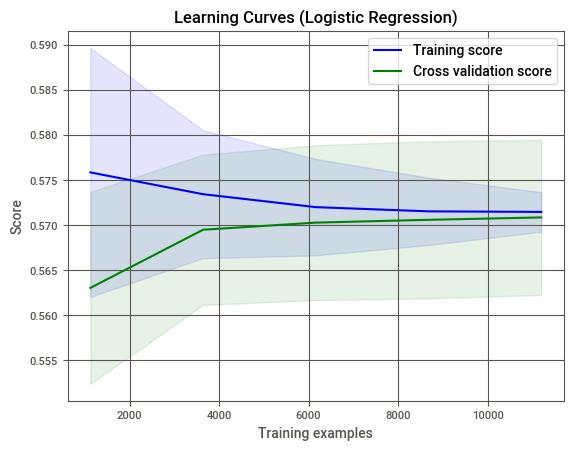

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1) #enheraf meyar
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g",
             label="Cross validation score")
    plt.legend(loc="best")
    return plt

X, y = new_df.iloc[:,:8].values, new_df.iloc[:,8].values #column 9 is for status
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations 
# each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

پاسخ بخش ب: چون این دیتاست نامتعادل است و تعداد داده های 0 و 1 تفاوت فاحشی دارند و ما این موضوع را در نظر گرفتیم و داده ها را متعادل کردیم پس نتایج خوب و قبل قبول اند.اگر هر دو امتیاز اعتبار سنجی و امتیاز آموزشی با افزایش اندازه مجموعه آموزشی به مقدار بسیار کم همگرا شوند، از داده های آموزشی بیشتر بهره نخواهیم برد.ما در اینجا با توجه به تمودار و همگرایی در مقدار پایین متوجه میشویم که ب افزایش دیتا از حدود  10000 دیگر بهبودی نداریم.

#Decision Tree Classifier and  Bagging Classifier

In [138]:
#balanced data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X = new_df.drop(['Status'],axis=1)
y = new_df['Status']

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)
average_precision = average_precision_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
print("roc_auc:", roc_auc) #preferred
print("average_precision:", average_precision)

Test set accuracy of bc: 0.55
Accuracy: 0.5078571428571429
roc_auc: 0.49916666666666676
average_precision: 0.42816415021293064


In [128]:
#imbalance data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X = df.drop(['Status'],axis=1)
y = df['Status']

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)
average_precision = average_precision_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
print("roc_auc:", roc_auc) #preferred
print("average_precision:", average_precision)

Test set accuracy of bc: 0.91
Accuracy: 0.8208658405996635
roc_auc: 0.5020253701955101
average_precision: 0.09282522103385618


#Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
X = new_df.drop(['Status'],axis=1)
y = new_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 
y_pred_rf = clf.predict(X_test)

confusion_matrix(y_test, y_pred_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)
average_precision = average_precision_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)#preferred
print("roc_auc:", roc_auc) 
print("average_precision:", average_precision)

Accuracy: 0.579
roc_auc: 0.49475393975788057
average_precision: 0.3966728726578351


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
X = df.drop(['Status'],axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 
y_pred_rf = clf.predict(X_test)

confusion_matrix(y_test, y_pred_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)
average_precision = average_precision_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
print("roc_auc:", roc_auc) #preferred
print("average_precision:", average_precision)

Accuracy: 0.9111213094691755
roc_auc: 0.5
average_precision: 0.08887869053082453


In [ ]:
'''
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()'''